In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

Using TensorFlow backend.
C:\Users\mypc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mypc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mypc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mypc\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [9]:
dataset_train=pd.read_csv(r"C:\Users\mypc\Downloads\Forecasting_COVID-19-master\Forecasting_COVID-19-master\Dataset\case_time_series.csv")

In [10]:
dataset_train

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30/01/2020,1,1,0,0,0,0
1,31/01/2020,0,1,0,0,0,0
2,01/02/2020,0,1,0,0,0,0
3,02/02/2020,1,2,0,0,0,0
4,03/02/2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
250,06/10/2020,71869,6754191,81945,5741231,990,104005
251,07/10/2020,78809,6833000,83209,5824440,963,104968
252,08/10/2020,70797,6903797,78745,5903185,967,105935
253,09/10/2020,73305,6977102,82628,5985813,929,106864


In [11]:
dataset_train['Date'] = pd.to_datetime(dataset_train['Date'], errors='coerce')

In [12]:
dataset_train['Date'] = dataset_train['Date'].dt.strftime('%Y-%m-%d')

In [13]:


cols = list(dataset_train)[1:]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (255, 7)
All timestamps == 255
Featured selected: ['Daily Confirmed', 'Total Confirmed', 'Daily Recovered', 'Total Recovered', 'Daily Deceased', 'Total Deceased']


In [15]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = np.array(dataset_train)

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (255, 6).


array([[1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [7.079700e+04, 6.903797e+06, 7.874500e+04, 5.903185e+06,
        9.670000e+02, 1.059350e+05],
       [7.330500e+04, 6.977102e+06, 8.262800e+04, 5.985813e+06,
        9.290000e+02, 1.068640e+05],
       [7.441800e+04, 7.051520e+06, 8.902200e+04, 6.074835e+06,
        9.210000e+02, 1.077850e+05]])

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.84792201],
       [-0.84795267],
       [-0.84795267],
       [-0.84792201],
       [-0.84792201],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84795267],
       [-0.84789134],
       [-0.84792201],
       [-0.84727806],
       [-0.84789134],
       [-0.84792201],
       [-0.84786068],
       [-0.84779935],
       [-0.8476767 ],
       [-0.84749271],
       [-0.84770736],
       [-0.84764603],
       [-0.84764603],
       [-0.84761537],
       [-0

In [20]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 15   # Number of days we want top predict into the future
n_past = 50   # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (191, 50, 5).
y_train shape == (191, 1).


In [21]:

# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [23]:
sudo pip install keras --upgrade 

SyntaxError: invalid syntax (<ipython-input-23-782ba1e3b453>, line 1)

In [28]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(lr=0.01), loss='mean_squared_error')

In [34]:
import tensorflow as tf

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = tf.keras.callbacks.TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Instructions for updating:
Use tf.cast instead.
Train on 152 samples, validate on 39 samples
Epoch 1/30
152/152 [==============================] - 7s 47ms/step - loss: 0.8531 - val_loss: 1.4522

Epoch 00001: val_loss improved from inf to 1.45217, saving model to weights.h5
Epoch 2/30
152/152 [==============================] - 0s 1ms/step - loss: 0.2313 - val_loss: 0.3311

Epoch 00002: val_loss improved from 1.45217 to 0.33107, saving model to weights.h5
Epoch 3/30
152/152 [==============================] - 0s 1ms/step - loss: 0.1287 - val_loss: 0.1174

Epoch 00003: val_loss improved from 0.33107 to 0.11744, saving model to weights.h5
Epoch 4/30
152/152 [==============================] - 0s 1ms/step - loss: 0.0500 - val_loss: 0.0975

Epoch 00004: val_loss improved from 0.11744 to 0.09749, saving model to weights.h5
Epoch 5/30
152/152 [==============================] - 0s 1ms/step - loss: 0.0939 - val_loss: 0.1296

Epoch 00005: val_loss did not improve from 0.09749
Epoch 6/30
152/152 [==

In [35]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [36]:

# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [37]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2020-05-23,6639.189453
2020-05-24,6706.224609
2020-05-25,6802.957031


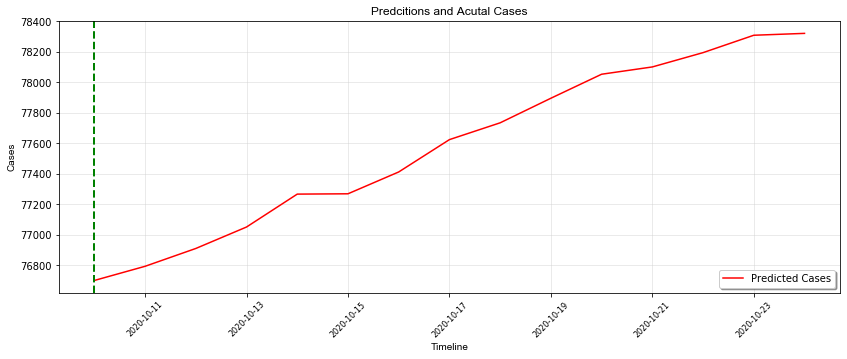

In [61]:

# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-06-01'


plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Cases')
#plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')
#plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['Daily Confirmed'], color='b', label='Actual Cases')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Cases', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Cases', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()